## Catchment Hydrology, MSc course
### Lecture 2: Budyko water balance models
#### Wouter R. Berghuijs (w.r.berghuijs@vu.nl)

In this notebook you will use the Budyko water balance model to estimate and describe how the long-term average water balance of a catchment behaves under particular climate conditions. 

In [1]:
# Import some packages to run Python
import numpy as np
import ipywidgets

### Potential evaporation

**Potential evaporation** is defined as the amount of evaporation that would
occur if a sufficient water source were available. Several formulas exist to estimate it.
We will use a simple example that is only based on temperature (Eq. 2B4.2 of Dingman):
$$E_p = 1.2 \cdot 10^{10} \cdot \text{exp}(-4620/T)     \text{          (mm/y)}$$ 
where $T$ = mean temperature (K). 


Note that this is a highly simplified formula, and in the course ecohydrology (and also in the BSc course Introduction to Hydrology) you will discussed more physically based formula's such as Penman-Monteith. In reality, potential evaporation will depend on a wider range of factors such as wind speed, humiditity, and radiation. However, ignoring these, and solely using temperature can give a first-order estimate of potential evaporation.

**Aridity** (dimensionless) is defined as the ratio of long-term and long-term potential evaporation ($E_p$) precipitation:
$$Aridity = E_p / P$$
where $P$ is the multi-year mean **precipitation** (mm/y) and $E_p$ is the multi-year **potential
evaporation** (mm/y). Thus, if aridity is smaller than one, it means there is more rain than potential evaporation (think for example of the west coast of Norway, because it is cold and and has a lot of rain). In contrast, high aridity values that are much larger than one reflect drier and/or warmer places (think for example of the Sahara desert, because it has almost no rain, and is warm).




### Calculate potential evaporation
To get some feel for what typical long-term average values of potential evaporation are, we calculate potential evaporation based on Eq. 2B4.2 of Dingman (also shown above). You can calculate this for a temperature of your choice by sliding the bar below.

In [2]:
# Potential evaporation based on temperature

def pot_evap(Temperature):
    T = 272.15+Temperature # Convert to Kelvin
    E_p = 1.2*10**10 * np.exp(-4620/T) # Calculate potential evaporation
    print("when the annual mean temperature is " + str(Temperature) + ' (Celsius)') #print value
    print("potential evaporation is " + str(int(E_p)) + ' (mm/y)') #print outcome
    
ipywidgets.interact(pot_evap,Temperature =(-10 , 30, 0.1))

interactive(children=(FloatSlider(value=10.0, description='Temperature', max=30.0, min=-10.0), Output()), _dom…

<function __main__.pot_evap(Temperature)>

### Estimate aridity
If we now also  indicate how much precipitation there is in an particular area, we can estimate aridity.

In [3]:
# Provide rainfall

def aridity(Precipitation, Pot_Evap):
    AI = Pot_Evap/Precipitation # Calculate potential evaporation
    print("For P is " + str(int(Precipitation)) + ' (mm/y)' + 
          "and E_p is " + str(int(Pot_Evap)) + ' (mm/y):') #print outcome


    print("Aridity is " + str(float(AI)) + ' (dimensionless)') #print outcome
    
ipywidgets.interact(aridity, Precipitation =(0 ,2000, 10),Pot_Evap=(0 ,2000, 10))

interactive(children=(IntSlider(value=1000, description='Precipitation', max=2000, step=10), IntSlider(value=1…

<function __main__.aridity(Precipitation, Pot_Evap)>

**Question 1: How much is the mean annual potential evaporation in the Netherlands, ?**

**Question 2: What is the aridity index of the Netherlands?**

**Question 3: How would both values change if temperature rises by 2 degrees Celsius?**

## How much streamflow would one expect based on Budyko?
How much the mean annual streamflow of a catchment is, depends on many factors. However, as we have seen in today's class, most of the between-catchment differences in the long-term water balance is determined by climate aridity. Budyko [1974] describes this global relationship as: 
$$E/P =  [E_p/P  \text{  tanh}⁡(P/E_p )(1-\text{exp}(-E_p/P)) ]^{1/2}$$
where $P$ is mean annual precipitation, $E$ is mean annual evapotranspiration, and $E_p$ is mean potential evaporation.

The Budyko curve (i.e. Eq. above) captures roughly 90% of the between catchment differences in evaporative fractions (this differences in how much of $P$ becomes $E$ versus $Q$) across over a thousand European catchments [Budyko, 1951]. The evidence of a strong universal relationship between aridity and the evaporative fraction has grown since, as more recent data also tend to show a relatively strong relation between aridity versus evaporative fractions and runoff ratios for many more catchments globally [e.g. Zhang et al., 2001; Potter et al., 2005; Trancoso et al., 2016; Padrón et al., 2017; Gnann et al., 2019]. To illustrate how catchments tend to fall near the Budyko curve, we here show long-term water balances from 410 catchments of the US MOPEX dataset [Duan et al., 2006] (Fig. 1; Spearman $\rho$ = 0.83). The strong relationship between aridity and the evaporative fraction (and runoff ratio) forms the basis of nearly all studies that use the Budyko framework. 

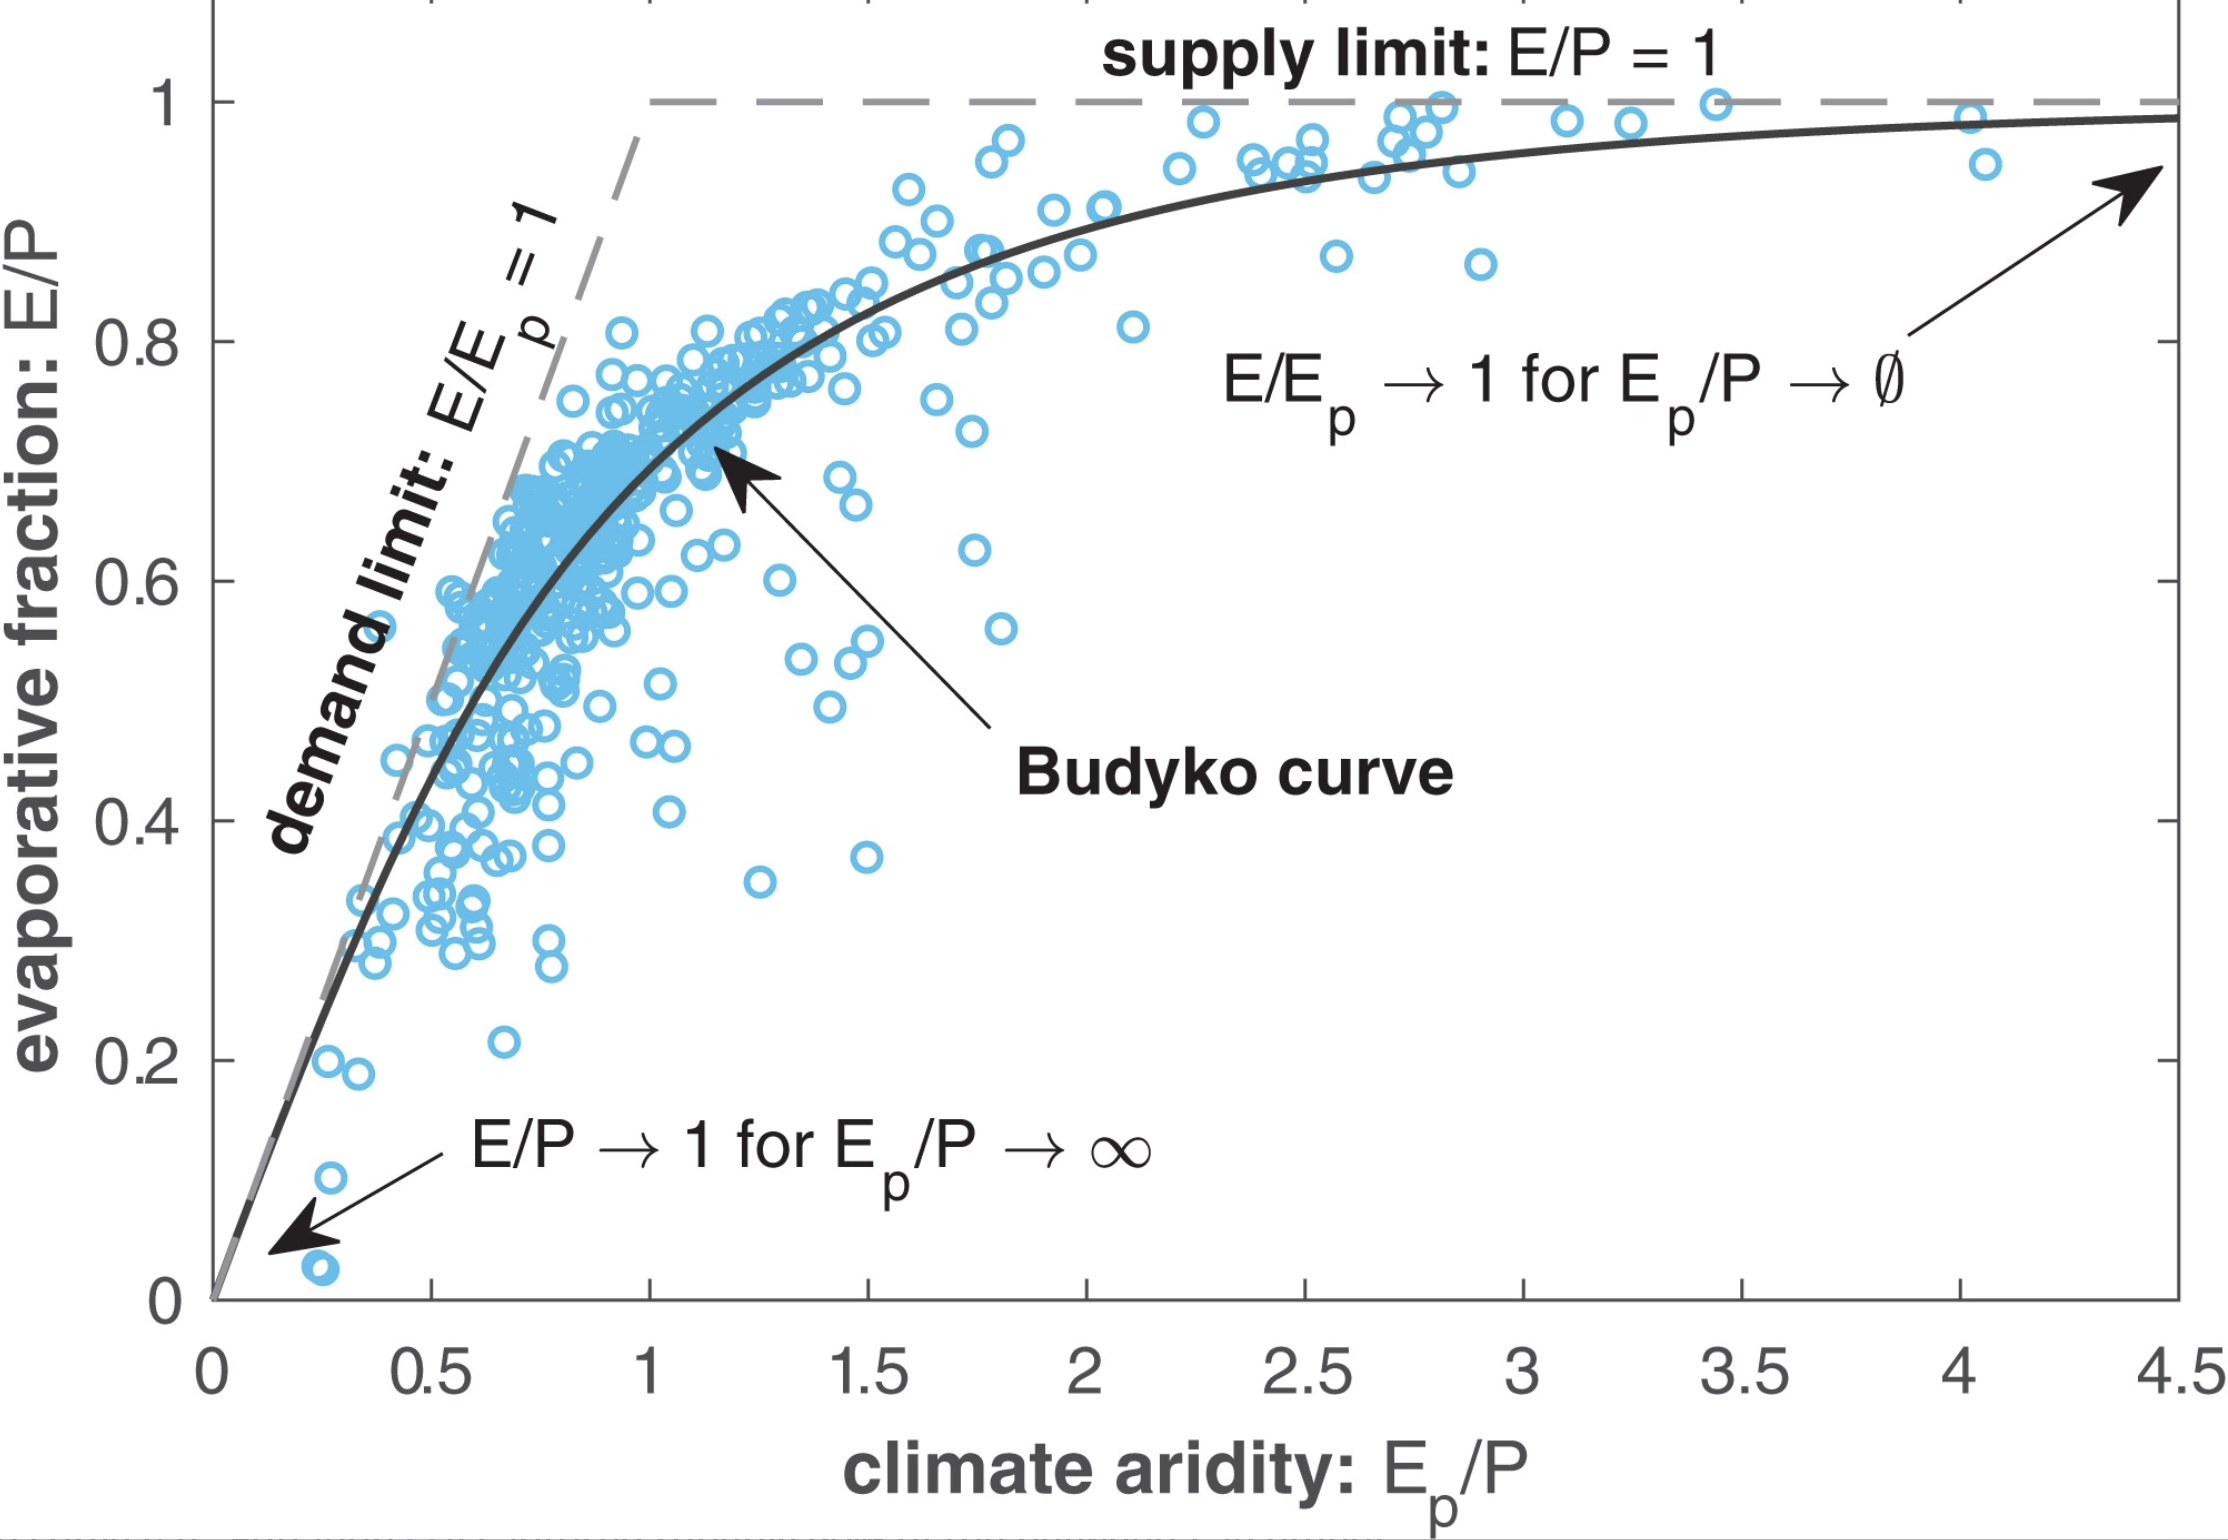

**Figure: The Budyko framework.** The x-axis contains the aridity index ($E_p/P$) and the y-axis the evaporative fraction ($E/P$), which often is approximated by one minus the runoff ratio ($E/P = 1-Q/P$) because storage changes are assumed to be negligible at multi-year timescales. Together, these two axes form the two-dimensional Budyko space. Catchments within the space should theoretically fall below the supply limit ($E/P = 1$) and the demand limit ($E/E_p = 1$), but tend to approach these limits under very arid or very wet conditions. Many catchments around the world fall around the Budyko curve (black solid line), including the long-term average date of 410 catchments located in the USA which are indicated by blue markers (**Source figure**: Berghuijs et al. [2020])

**Question 4: Why does evaporation not exceed the demand and supply limits depicted in the Figure above?**


## Estimated streamflow and evaporation based on the Budyko curve
Let's pick climate values (e.g., the values we filled in above) and use these to estimate how much streamflow (per unit area) we expect. You can do this by adjusting the aridity and the total precipitation 

In [4]:
# Use Budyko's equation, fill in the aridity to determine the evaporation fraction (E/P)
def Evap_fraction(AI, P):
    EP = ((AI *np.tanh(1/AI))*(1-np.exp(-AI)))**(0.5)
    # Write out this evaporative fraction
    print('For the chosen aridity (dimensionless) and precipitation (mm/y)')
    print("the fraction of P that becomes E is " + str(EP))

    # Write out runoff ratio (which is Q/P = 1/E/P)
    print("and the fraction of P that becomes Q is " + str(1-EP))

    # Multiply by P to get total flow rate in mm/y
    print("The annual flow rate is expected to be around " + str(int((1-EP)*P)) + " (mm/y)")

ipywidgets.interact(Evap_fraction, AI  = (0 ,2.5, 0.1), P =(0 ,2000, 10))

interactive(children=(FloatSlider(value=1.2000000000000002, description='AI', max=2.5), IntSlider(value=1000, …

<function __main__.Evap_fraction(AI, P)>

**Question 5: On average, what fraction of precipitation becomes streamflow when aridity is one?**

**Question 6: How much higher and lower does this fraction become when a place becomes twice as arid, or twice as wet?**

## Answers 

**Question 1: How much is the mean annual potential evaporation in the Netherlands?**

The mean temperature in NL is around 10-11 degrees Celsius in recent years. This mean that potential evaporation (according to the formula given above) is roughly 928-984 mm per pear. Let's take the average of ~950 mm per year.

**Question 2: What is the aridity index of the Netherlands?**

Annual precipitation in NL is approximately 850 mm per year. We already determined potential evaporation at ~950mm per year. Thus the ardity index of NL would be 950/850 = 1.1. 

**Question 3: How would both values change if temperature rises by 2 degrees Celsius?**

Increasing the temperature by 2 degrees Celsius increases potential evaporation by just over 10% according to the provided formula. For example, 10 --> 12 degrees Celsius would be 928 --> 1042 mm per year of potential evaporation, whereas 11 --> 13 degrees would be  984 --> 1103 mm per year of potential evaporation. As a consequence the aridity index would also become just over 10% larger.

**Question 4: Why does evaporation not exceed the demand and supply limits depicted in the Figure above?**


At multi-year timescales, the amount of water leaving a catchment is restricted by how much water is supplied to the catchment (over that same period). The supply of water to a catchment equals precipitation. The amount of water leaving the catchment is the sum of streamflow and evaporation. Thus evaporation will not exceed precipitation (unless other water sources are present, or storage in the catchment is strongly depleted). Evaporation also cannot exceed the amount of energy that is available for evaporation (i.e. potential evaporation). Thus the demand limit can also not be exceeded. 

**Question 5: On average, what fraction of precipitation becomes streamflow when aridity is one?**

For an aridity index of 1, the fraction of P that becomes E is 0.69 according to Budyko's formula. Thus, in these cases most precipitation will never reach the stream and will be evaporated instead.

**Question 6: How much higher and lower does this fraction become when a place becomes twice as arid, or twice as wet?**

If it becomes twice as wet (i.e. the aridity becomes 0.5) the fraction of P that becomes E is 0.44. Thus in this case (we'd expect) just over half of precipitation to become streamflow.

If it becomes twice and arid (i.e. the aridity becomes 2) the fraction of P that becomes E is 0.89. In this case only 11% of precipitation is expected to end up in streams and instead the vasty majority of precipitation (~90%) will be evaporated back to the atmosphere. 